# Using Biopython to produce Phylogenetic trees from Multiple Sequence Alignments

This notebook shows the steps of creating a 'distance matrix' from a multiple sequence alignment and producing a phylogenetic tree from that. 

The example sequences used are tRNA sequences from the human reference genome. There is an introduction to the sequences further down this notebook. 

## setup
Run this set-up cell.

In [1]:
import copy
from io import StringIO
%matplotlib inline

We need to have Biopython installed and available, so lets check:

In [2]:
# import the Phylogeny class from BioPython to check it works
try:
    from Bio import Phylo
    print('Success Biopython import works')
except ImportError:
    print('ERROR Biopython not available you will need to install it')

Success Biopython import works


If you use conda it is easy to install Biopython by 
```
conda install biopython
```
or it can be installed using pip
```
pip install biopython
```

In [3]:
# this cell will try a conda install of biopython
# it should work on azure
# https://notebooks.azure.com/help/jupyter-notebooks/package-installation
try:
    from Bio import Phylo
except ImportError:
    !conda install biopython -y

In [4]:
# run this cell for the  the Biopython imports we will use.
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import *
from Bio import AlignIO

## Thr tRNA example sequence alignment

Transfer RNA is a very important class of macromolecules - tRNAs transfer amino acids to the growing protein polypeptide chain at the active site of the ribosome. By recognizing the codon (three-nucleotide 'word' )in the messenger RNA they ensure that the amino-acid coded by that is added. 

The correct amino acid is attached to the transfer-RNA by a specialized enzyme called an amino-acyl tRNA synthetase.

You know that there are more than one codon for some amino acids. For example Thr threonine is specified by three codons in the standard genetic code: ACU, ACC, ACA, and ACG. The final position is not important in the code as any nucleotide would apparently give Thr. This is called the 'wobble' base. 

There are only three classes of Thr tRNAs in humans for ACA (AGT), ACG (CGT), and ACA (TGT) (where the second sequence is the anticodon - the reverse complement of the codon). The final expected tRNA for ACC (GGT) does not occur and this codon is read by one of the others using non-standard base pairing at the 'wobble' position. 

Because tRNA is needed in large amounts there are multiple copies of tRNA genes in most organisms. In humans there is a total of 400 or so and they are scattered around the genome. 

There are 20 tRNA Thr genes in the human reference genome. The alignment here is of just 6 representative ones covering the three classes (prepared using the MUSCLE multiple alignment program).

The sequences here are the mature sequences of the RNAs. Remember that the Thymidine nucleotide (base Thymine) in the gene sequence is replaced with Uridine (base Uracil) in the final molecule. There are also many crucial modified bases in mature tRNAs but we are ignoring these complications.

Read in the example file human-Thr-tRNA-mature-examples.afa

In [5]:
aln = AlignIO.read('human-Thr-tRNA-mature-examples.afa', 'fasta')

In [6]:
print(aln)

SingleLetterAlphabet() alignment with 6 rows and 74 columns
GGCUCCGUAGCUUAGUUGGUUAAAGCGCCUGUCUAGUAAACAGG...CCU h_tRNA-Thr-AGT-3-1
GGCUCUAUGGCUUAGUUGGUUAAAGCGCCUGUCUCGUAAACAGG...CCU h_tRNA-Thr-CGT-1-1
GGCUCUAUGGCUUAGUUGGUUAAAGCGCCUGUCUUGUAAACAGG...CCU h_tRNA-Thr-TGT-1-1
GGCUCCAUAGCUCAG-UGGUUAGAGCACUGGUCUUGUAAACCAG...CCU h_tRNA-Thr-TGT-2-1
GGCUCCAUAGCUCAG-GGGUUAGAGCGCUGGUCUUGUAAACCAG...CCU h_tRNA-Thr-TGT-3-1
GGCUCCAUAGCUCAG-GGGUUAGAGCACUGGUCUUGUAAACCAG...CCU h_tRNA-Thr-TGT-4-1


In [7]:
calculator = DistanceCalculator('identity')

Here the distance calculator is set up to use a simple identity comparison among the sequences. You can maybe see that there are not very many differences among the sequences. This is because they are all from humans and need to function with the same enzymes to accept the amino acid.

Unlike the previous similarity calculations using identity, here the identity is being used to highlight differences between the sequences as these can be used directly as distances. The identity calculation is expressed as a fractional difference over all the columns in common to the sequences. 

After the calculator is created with the model, simply use the get_distance() method to get the distance matrix of a given alignment object. Then you will get a DistanceMatrix object.

In [8]:
dm = calculator.get_distance(aln)
print(dm)

h_tRNA-Thr-AGT-3-1	0
h_tRNA-Thr-CGT-1-1	0.06756756756756754	0
h_tRNA-Thr-TGT-1-1	0.10810810810810811	0.05405405405405406	0
h_tRNA-Thr-TGT-2-1	0.28378378378378377	0.28378378378378377	0.29729729729729726	0
h_tRNA-Thr-TGT-3-1	0.28378378378378377	0.28378378378378377	0.29729729729729726	0.05405405405405406	0
h_tRNA-Thr-TGT-4-1	0.29729729729729726	0.29729729729729726	0.29729729729729726	0.05405405405405406	0.027027027027026973	0
	h_tRNA-Thr-AGT-3-1	h_tRNA-Thr-CGT-1-1	h_tRNA-Thr-TGT-1-1	h_tRNA-Thr-TGT-2-1	h_tRNA-Thr-TGT-3-1	h_tRNA-Thr-TGT-4-1


Remember that distance-based methods were just one of the approaches to constructing a phylogenetic tree from a set of aligned sequences.

Check back to see what the other two approaches were called. 

Within the group of distance-based methods there were a number of different algorithms for creating a tree.

The Biopython Phylo module has a DistanceTreeConstructor. This can use either the neighbour-joining (nj) or unweighted pair group method (upgma). The method to be applied is given as a string parameter.

In [9]:
constructor = DistanceTreeConstructor(calculator, 'upgma')

In [10]:
tree = constructor.build_tree(aln)

The UPGMA algorithm should give a rooted tree. The NJ algorithm would give an unrooted tree. 

The Phylo module has a hierarchical Tree object that uses the phylogenetic term 'Clade' for groups.

It takes the sequence names as the labels of the 'leaf' nodes of the tree.

The tree also has branching nodes - inner nodes - which are given default names by the constructor.

In [11]:
print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.11782094594594594, name='Inner2')
            Clade(branch_length=0.013513513513513542, name='Inner1')
                Clade(branch_length=0.013513513513513487, name='h_tRNA-Thr-TGT-4-1')
                Clade(branch_length=0.013513513513513487, name='h_tRNA-Thr-TGT-3-1')
            Clade(branch_length=0.02702702702702703, name='h_tRNA-Thr-TGT-2-1')
        Clade(branch_length=0.10092905405405406, name='Inner4')
            Clade(branch_length=0.016891891891891886, name='Inner3')
                Clade(branch_length=0.02702702702702703, name='h_tRNA-Thr-TGT-1-1')
                Clade(branch_length=0.02702702702702703, name='h_tRNA-Thr-CGT-1-1')
            Clade(branch_length=0.043918918918918914, name='h_tRNA-Thr-AGT-3-1')


The module has a simple ascii method for representing the tree across the output window. 

In [12]:
Phylo.draw_ascii(tree)

                                                      _____ h_tRNA-Thr-TGT-4-1
                                                 ____|
  ______________________________________________|    |_____ h_tRNA-Thr-TGT-3-1
 |                                              |
 |                                              |__________ h_tRNA-Thr-TGT-2-1
_|
 |                                               __________ h_tRNA-Thr-TGT-1-1
 |                                        ______|
 |_______________________________________|      |__________ h_tRNA-Thr-CGT-1-1
                                         |
                                         |_________________ h_tRNA-Thr-AGT-3-1



There is also a nicer graphic view available. 

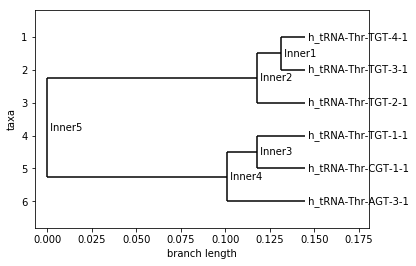

In [13]:
Phylo.draw(tree)

Looking at the anticodon labels for these tRNA groupings, do you notice anything interesting? 

## student exercise

recalculate the tree above using the neighbour-joining (nj) method and produce a nice graphic from this.

In [14]:
# your job write python to draw a tree for the tRNA alingment using neighbour-joining

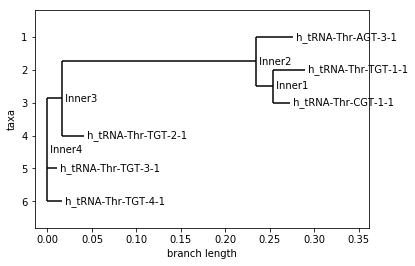

In [15]:
# ANSWER remove before publishing
constructor = DistanceTreeConstructor(calculator, method='nj')
tree = constructor.build_tree(aln)
Phylo.draw(tree)

## Student exercise


Myoglobin is an oxygen binding protein that is found in vertebrate muscle https://en.wikipedia.org/wiki/Myoglobin

In this exercise we will create a multiple sequence alignment of a number of myoglobins from different species.

To start we some myoglobin sequences to align. Here are 6 myoglobins from mammals, fish and a shark in FASTA format:

```
>MyG_human
GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETL
EKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKG
HHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHP
GDFGADAQGAMNKALELFRKDMASNYKELGFQG
>MyG_whale
VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASED
LKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHP
GDFGADAQGAMNKALELFRKDIAAKYKELGYQG
>MyG_platypus
GLSDGEWQLVLKVWGKVEGDLPGHGQEVLIRLFKTHPETLEKFDKFKGLKTEDEMKASAD
LKKHGGTVLTALGNILKKKGQHEAELKPLAQSHATKHKISIKFLEYISEAIIHVLQSKHS
ADFGADAQAAMGKALELFRNDMAAKYKEFGFQG
>MyG_gummyshark
VDWEKVNSVWSAVESDLTAIGQNILLRLFEQYPESQNHFPKFKNKSLGELKDTADIKAQA
DTVLSALGNIVKKKGSHSQPVKALAATHITTHKIPPHYFTKITTIAVDVLSEMYPSEMNA
QVQAAFSGAFKIICSDIEKEYKAANFQG
>MyG_Bluemarlin
MADFEMVLKHWGPVEADYATHGNLVLTRLFTEHPETQKLFPKFAGIAKADMAGNAAISAH
GATVLKKLGELLKAKGSHAAIIKPMANSHATKHKIPIKNFELISEVIGKVMHEKAGLDAA
GQKALKNVMTTIIADIEANYKELGFTG
>MyG_tuna
MADLDAVLKCWGAVEADFNTVGGLVLARLFKDHPETQKLFPKFAGITGDIAGNAAVAAHG
ATVLKKLGELLKAKGNHAAIIKPLANSHAKQHKIPINNFKLITEALAHVLHEKAGLDAAG
QTALRNVMGIVIADLEANYKELGFTG
```

**Your first task (a)** is to add the sequences for the myoglobins from `horse` and `carp`. Find the *protein sequences* at EBI https://www.ebi.ac.uk/ by search for `horse myoglobin` and add them to the fasta records in the next cell:

## Task (b): create multiple sequence alignment for myoglobins using MUSCLE

Using the selected myoglobin sequences we have assembled above use the MUSCLE multiple sequence program.
You can install this on your laptop if you want but it is easier to use the EBI server:

https://www.ebi.ac.uk/Tools/msa/muscle/

Paste your myoglobin sequences. And leave everything as a default.

Once the server has run hit the `Download Alignment file` and then copy the CLUSTAL format 
alignment into the next Jupyter notebook cell:

In [16]:
# edit this cell for your alignment - replacing this cutdown example with you bigger alignment
myg_align_string = """CLUSTAL multiple sequence alignment by MUSCLE (3.8)


MyG_human         GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASED
MyG_whale         VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASED
MyG_platypus      GLSDGEWQLVLKVWGKVEGDLPGHGQEVLIRLFKTHPETLEKFDKFKGLKTEDEMKASAD
                   **:*******:**.***.*:.****::****** *********.** **:* ***** *

MyG_human         LKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHP
MyG_whale         LKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHP
MyG_platypus      LKKHGGTVLTALGNILKKKGQHEAELKPLAQSHATKHKISIKFLEYISEAIIHVLQSKHS
                  ***** ******* ******:****:*************.:*:**:***.**:**:*.*.

MyG_human         GDFGADAQGAMNKALELFRKDMASNYKELGFQG
MyG_whale         GDFGADAQGAMNKALELFRKDIAAKYKELGYQG
MyG_platypus      ADFGADAQAAMGKALELFRNDMAAKYKEFGFQG
                  .*******.**.*******:*:*::***:*:**
"""

In [17]:
# ANSWER remove before publishing
myg_align_string = """CLUSTAL multiple sequence alignment by MUSCLE (3.8)


MyG_gummyshark      -----VDWEKVNSVWSAVESDLTAIGQNILLRLFEQYPESQNHFPKFKNK-SLGELKDTA
MyG_platypus        -GLSDGEWQLVLKVWGKVEGDLPGHGQEVLIRLFKTHPETLEKFDKFKGLKTEDEMKASA
MyG_whale           -VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASE
MyG_human           -GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASE
MYG_HORSE           MGLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKFDKFKHLKTEAEMKASE
MYG_carp            ----MHDAELVLKCWGGVEADFEGTGGEVLTRLFKQHPETQKLFPKFVGI-ASNELAGNA
MyG_Bluemarlin      ----MADFEMVLKHWGPVEADYATHGNLVLTRLFTEHPETQKLFPKFAGI-AKADMAGNA
MyG_tuna            ----MADLDAVLKCWGAVEADFNTVGGLVLARLFKDHPETQKLFPKFAGI--TGDIAGNA
                          : : *   *. **.*    *  :* ***  :**: : * .*       ::  . 

MyG_gummyshark      DIKAQADTVLSALGNIVKKKGSHSQPVKALAATHITTHKIPPHYFTKITTIAVDVLSEMY
MyG_platypus        DLKKHGGTVLTALGNILKKKGQHEAELKPLAQSHATKHKISIKFLEYISEAIIHVLQSKH
MyG_whale           DLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRH
MyG_human           DLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKH
MYG_HORSE           DLKKHGTVVLTALGGILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISDAIIHVLHSKH
MYG_carp            AVKAHGATVLKKLGELLKARGDHAAILKPLATTHANTHKIALNNFRLITEVLVKVMAEK-
MyG_Bluemarlin      AISAHGATVLKKLGELLKAKGSHAAIIKPMANSHATKHKIPIKNFELISEVIGKVMHEK-
MyG_tuna            AVAAHGATVLKKLGELLKAKGNHAAIIKPLANSHAKQHKIPINNFKLITEALAHVLHEK-
                     :  :. .**. ** ::* .* *   :*.:* :* . ***. : :  *:     *: .  

MyG_gummyshark      PSEMNAQVQAAFSGAFKIICSDIEKEYKAANFQG
MyG_platypus        SADFGADAQAAMGKALELFRNDMAAKYKEFGFQG
MyG_whale           PGDFGADAQGAMNKALELFRKDIAAKYKELGYQG
MyG_human           PGDFGADAQGAMNKALELFRKDMASNYKELGFQG
MYG_HORSE           PGDFGADAQGAMTKALELFRNDIAAKYKELGFQG
MYG_carp            -AGLDAGGQSALRRVMDVVIGDIDTYYKEIGFAG
MyG_Bluemarlin      -AGLDAAGQKALKNVMTTIIADIEANYKELGFTG
MyG_tuna            -AGLDAAGQTALRNVMGIVIADLEANYKELGFTG
                     . :.*  * *:  .:  .  *:   **  .: *
"""

Rather than storing the MUSCLE alignment result as a disk file and reading from the file, it is easiest to keep the data as a string within this notebook. This can be done using a Python library called StringIO., see https://stackoverflow.com/a/38374360

In [18]:
# run this cell to read your alignment into Biopython AlignIO
from io import StringIO
myg_align_io = StringIO(myg_align_string)
myg_aln = AlignIO.read(myg_align_io, format="clustal")
myg_align_io.close()
print(myg_aln)

SingleLetterAlphabet() alignment with 8 rows and 154 columns
-----VDWEKVNSVWSAVESDLTAIGQNILLRLFEQYPESQNHF...FQG MyG_gummyshark
-GLSDGEWQLVLKVWGKVEGDLPGHGQEVLIRLFKTHPETLEKF...FQG MyG_platypus
-VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF...YQG MyG_whale
-GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKF...FQG MyG_human
MGLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKF...FQG MYG_HORSE
----MHDAELVLKCWGGVEADFEGTGGEVLTRLFKQHPETQKLF...FAG MYG_carp
----MADFEMVLKHWGPVEADYATHGNLVLTRLFTEHPETQKLF...FTG MyG_Bluemarlin
----MADLDAVLKCWGAVEADFNTVGGLVLARLFKDHPETQKLF...FTG MyG_tuna


## Task (c): create a phylogenetic tree 
Using code from above draw a phylogenetic tree from the alignment using the `upgma` method.

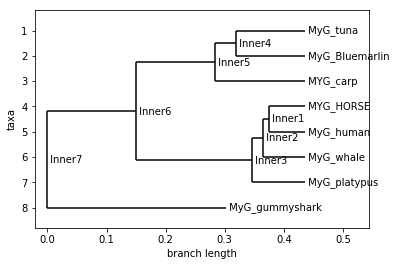

In [19]:
# ANSWER remove before publishing
myg_tree = DistanceTreeConstructor(calculator, 'upgma').build_tree(myg_aln)
Phylo.draw(myg_tree)

## Task (d) is the unknown sequence a mammalian or fish myoglobin?

Here is a myglobin sequence from an animal (may be a seal) that washed up in Norfolk. It was too degraded for DNA analysis but a myoglobin protein sequence was obtained:
```
>unknown
MADYDLVLRCWGPVEADYNTHGGLVLTRLFTEHPDTQKLFPKLAGVGELAASVAVASHGA
TVLKKLGELLKTRGDHAALLKPLATSHANVHKIPINNFKLITEVIAKHMAEKAGLDAAGQ
EALRKVMSVVIADMDATYKELGFSG
```
Construct a phylogenetic tree comparing unknown and other sequences. Is the sequence from a seal?

In [20]:
# construct a phy

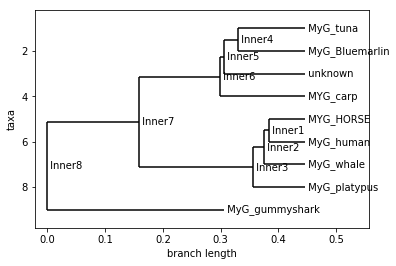

In [21]:
# ANSWER remove before publishing
unknown_muscle = """CLUSTAL multiple sequence alignment by MUSCLE (3.8)


MyG_gummyshark      -----VDWEKVNSVWSAVESDLTAIGQNILLRLFEQYPESQNHFPKFKNK-SLGELKDTA
MyG_platypus        -GLSDGEWQLVLKVWGKVEGDLPGHGQEVLIRLFKTHPETLEKFDKFKGLKTEDEMKASA
MyG_whale           -VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASE
MyG_human           -GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASE
MYG_HORSE           MGLSDGEWQQVLNVWGKVEADIAGHGQEVLIRLFTGHPETLEKFDKFKHLKTEAEMKASE
MYG_carp            ----MHDAELVLKCWGGVEADFEGTGGEVLTRLFKQHPETQKLFPKFVGI-ASNELAGNA
unknown             ----MADYDLVLRCWGPVEADYNTHGGLVLTRLFTEHPDTQKLFPKLAGV---GELAASV
MyG_Bluemarlin      ----MADFEMVLKHWGPVEADYATHGNLVLTRLFTEHPETQKLFPKFAGI-AKADMAGNA
MyG_tuna            ----MADLDAVLKCWGAVEADFNTVGGLVLARLFKDHPETQKLFPKFAGI--TGDIAGNA
                          : : *   *. **.*    *  :* ***  :*:: : * .:       ::  . 

MyG_gummyshark      DIKAQADTVLSALGNIVKKKGSHSQPVKALAATHITTHKIPPHYFTKITTIAVDVLSEMY
MyG_platypus        DLKKHGGTVLTALGNILKKKGQHEAELKPLAQSHATKHKISIKFLEYISEAIIHVLQSKH
MyG_whale           DLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRH
MyG_human           DLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKH
MYG_HORSE           DLKKHGTVVLTALGGILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISDAIIHVLHSKH
MYG_carp            AVKAHGATVLKKLGELLKARGDHAAILKPLATTHANTHKIALNNFRLITEVLVKVMAEK-
unknown             AVASHGATVLKKLGELLKTRGDHAALLKPLATSHANVHKIPINNFKLITEVIAKHMAEK-
MyG_Bluemarlin      AISAHGATVLKKLGELLKAKGSHAAIIKPMANSHATKHKIPIKNFELISEVIGKVMHEK-
MyG_tuna            AVAAHGATVLKKLGELLKAKGNHAAIIKPLANSHAKQHKIPINNFKLITEALAHVLHEK-
                     :  :. .**. ** ::* .* *   :*.:* :* . ***. : :  *:      : .  

MyG_gummyshark      PSEMNAQVQAAFSGAFKIICSDIEKEYKAANFQG
MyG_platypus        SADFGADAQAAMGKALELFRNDMAAKYKEFGFQG
MyG_whale           PGDFGADAQGAMNKALELFRKDIAAKYKELGYQG
MyG_human           PGDFGADAQGAMNKALELFRKDMASNYKELGFQG
MYG_HORSE           PGDFGADAQGAMTKALELFRNDIAAKYKELGFQG
MYG_carp            -AGLDAGGQSALRRVMDVVIGDIDTYYKEIGFAG
unknown             -AGLDAAGQEALRKVMSVVIADMDATYKELGFSG
MyG_Bluemarlin      -AGLDAAGQKALKNVMTTIIADIEANYKELGFTG
MyG_tuna            -AGLDAAGQTALRNVMGIVIADLEANYKELGFTG
                     . :.*  * *:  .:  .  *:   **  .: *
"""
unknown_align_io = StringIO(unknown_muscle)
unknown_aln = AlignIO.read(unknown_align_io, format="clustal")
unknown_align_io.close()
unknown_tree = DistanceTreeConstructor(calculator, 'upgma').build_tree(unknown_aln)
Phylo.draw(unknown_tree)

## # answer remove before publishing

The unknown is not from a mammal but a fish - closest to carp.

## Task (e) BLAST the unknown sequence 

Using https://www.ebi.ac.uk/Tools/sss/ncbiblast/ What is the top BLAST hit for the unknown sequence in the full UniProt Knowledgebase?

## # answer remove before publishing

The Top hit is UniProtKB - A1YQ89 https://www.uniprot.org/uniprot/A1YQ89 Myoglobin from Gadus morhua (Atlantic cod) https://www.wikiwand.com/en/Atlantic_cod. Not a seal.

Background reading *Myoglobin as a Molecular Marker for Phylogenetic Relationships of Fish* https://doi.org//10.17265/2161-6264/2018.02.007